# Assignment 1

**Assignment 1: Optimization**

**Goal**: ​Get familiar with gradient-based and derivative-free optimization by implementing these methods and applying them to a given function.

In this assignment we are going to learn about **gradient-based** (GD) optimization methods and **derivative-free optimization** (DFO) methods. The goal is to implement these methods (one from each group) and analyze their behavior. Importantly, we aim at noticing differences between these two groups of methods.

Here, we are interested in ​minimizing​ the following function:

$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7
$$

in the domain $\mathbf{x} = (x_1, x_2) \in [-100, 100]^{2}$ (i.e., $x_1 \in [-100, 100]$, $x_2 \in [-100, 100]$).

In this assignemnt, you are asked to implement:
1. The gradient-descent algorithm.
2. A chosen derivative-free algorithm. *You are free to choose a method.*

After implementing both methods, please run experiments and compare both methods. Please find a more detailed description below.

## 1. Understanding the objective

Please run the code below and visualize the objective function. Please try to understand the objective function, what is the optimum (you can do it by inspecting the plot).

If any code line is unclear to you, please read on that in numpy or matplotlib docs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# PLEASE DO NOT REMOVE!
# The objective function.
def f(x):
    return x[:,0]**2 + 2*x[:,1]**2 -0.3*np.cos(3.*np.pi*x[:,0])-0.4*np.cos(4.*np.pi*x[:,1])+0.7

In [3]:
# PLEASE DO NOT REMOVE!
# Calculating the objective for visualization.
def calculate_f(x1, x2):
  f_x = []
  for i in range(len(x1)):
    for j in range(len(x2)):
      f_x.append(f(np.asarray([[x1[i], x2[j]]])))
    
  return np.asarray(f_x).reshape(len(x1), len(x2))

In [4]:
# PLEASE DO NOT REMOVE!
# Define coordinates
x1 = np.linspace(-100., 100., 400)
x2 = np.linspace(-100., 100., 400)

# Calculate the objective
f_x = calculate_f(x1, x2).reshape(len(x1), len(x2))

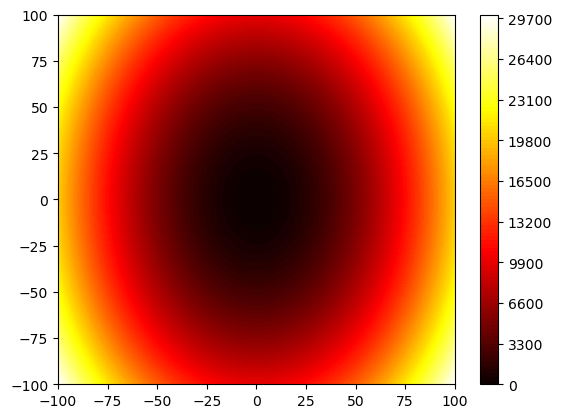

In [5]:
# PLEASE DO NOT REMOVE!
# Plot the objective
plt.contourf(x1, x2, f_x, 100, cmap='hot')
plt.colorbar()

## 2. The gradient-descent algorithm

First, you are asked to implement the gradient descent (GD) algorithm. Please take a look at the class below and fill in the missing parts.

NOTE: Please pay attention to the inputs and outputs of each function.

NOTE: To implement the GD algorithm, we need a gradient with respect to $\mathbf{x}$ of the given function. Please calculate it on a paper and provide the solution below. Then, implement it in an appropriate function that will be further passed to the GD class.

$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7
$$

in the domain $\mathbf{x} = (x_1, x_2) \in [-100, 100]^{2}$ (i.e., $x_1 \in [-100, 100]$, $x_2 \in [-100, 100]$).
$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7
$$

in the domain $\mathbf{x} = (x_1, x_2) \in [-100, 100]^{2}$ (i.e., $x_1 \in [-100, 100]$, $x_2 \in [-100, 100]$).**Question 1 (0-1pt):** What is the gradient of the function $f(\mathbf{x})$?

**Answer:**
$$
\begin{align*}
\nabla_{\mathbf{x}_1} f(\mathbf{x}) &= ? \\
\nabla_{\mathbf{x}_2} f(\mathbf{x}) &= ? \\
\end{align*}
$$
We have

$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7
$$

$$
f_{x_{1}}(\mathbf{x}) = 2x_{1} + 0.9 \pi \sin (3 \pi x_{1})
$$
$$
f_{x_{2}}(\mathbf{x}) = 4x_{2} + 1.6 \pi \sin (4 \pi x_{2})
$$

In [6]:
#=========
# GRADING:
# 0
# 0.5pt - if properly implemented and commented well
#=========
# Implement the gradient for the considered f(x).
def grad(x):
    
  #------
  # PLEASE FILL IN:
  # ...
  # grad = ...
  #------
    #print(f"x0 {x[:,0]} x1 {x[:,1]} len {len(x[:,0])}")
    
    #The formulas as found above.
    dx1 = 2*x[:,0] + 0.9*np.pi*np.sin(3.*np.pi*x[:,0])
    dx2= 4*x[:,1] + 1.6*np.pi*np.sin(4.*np.pi*x[:,1])
    
    #We transpose it to match inputs in the step function below. Our gradient is a 2D vector 
    grad = np.asarray([dx1, dx2]).T
                              
    return grad

In [7]:
#=========
# GRADING:
# 0
# 0.5pt if properly implemented and commented well
#=========
# Implement the gradient descent (GD) optimization algorithm. 
# It is equivalent to implementing the step function.
class GradientDescent(object):
    def __init__(self, grad, step_size=0.1):
        self.grad = grad
        self.step_size = step_size    

    def step(self, x_old):
        #We apply the formula for gradient descent. Grad outputs the direction, we scale it with step size, then we move to x_new.
        x_new = x_old - step_size * grad(x_old)
        return x_new

In [8]:
# PLEASE DO NOT REMOVE!
# An auxiliary function for plotting.
def plot_optimization_process(ax, optimizer, title):
    # Plot the objective function
    ax.contourf(x1, x2, f_x, 100, cmap="hot")

    # Init the solution
    x = np.asarray([[90.0, -90.0]])
    x_opt = x
    # Run the optimization algorithm
    for i in range(num_epochs):
        x = optimizer.step(x)
        x_opt = np.concatenate((x_opt, x), 0)

    ax.plot(x_opt[:, 0], x_opt[:, 1], linewidth=3.0)
    ax.set_title(title)

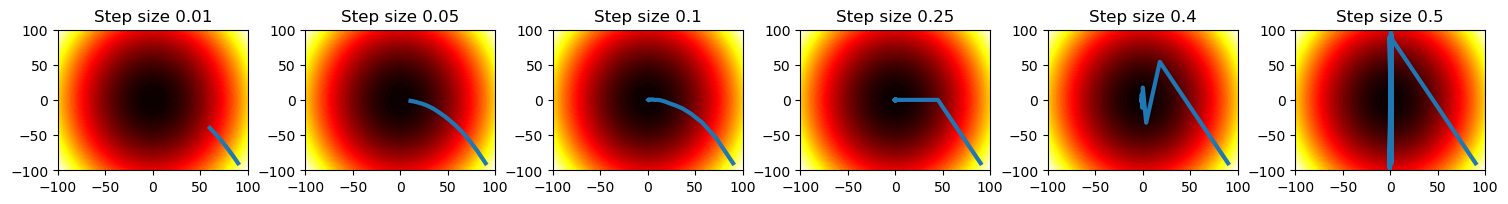

In [9]:
# PLEASE DO NOT REMOVE!
# This piece of code serves for the analysis.
# Running the GD algorithm with different step sizes
num_epochs = 20  # the number of epochs
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5]  # the step sizes

# plotting the convergence of the GD
fig_gd, axs = plt.subplots(1, len(step_sizes), figsize=(15, 2))
fig_gd.tight_layout()

for i in range(len(step_sizes)):
    # take the step size
    step_size = step_sizes[i]
    # init the GD
    gd = GradientDescent(grad, step_size=step_size)
    # plot the convergence
    plot_optimization_process(
        axs[i], optimizer=gd, title="Step size " + str(gd.step_size)
    )

**Question 2 (0-0.5pt)**: Please analyze the plots above and comment on the behavior of the gradient-descent for different values of the step size.

**Answer**:

**Step 0.01:** The stepsize is relatively small, so we need to take many steps to reach the extremum, which means we need many epochs for convergence. We can see the system didn't converge, so we would either raise step size or increase number of epochs. <br>
**Step 0.5:** The stepsize is too big in this case, each step overshoots the extremum point, but stays within bounds. Any size bigger than this would result in divergence. We need to make the step size smaller for convergence. <br>
The other **step sizes** result in well enough convergence. The size **0.25** seems optimal in this case, as **0.4** is almost too big because it overshoots to some degree but converges anyway. The smaller ones are in between these comments.  


**Question 3 (0-0.5pt)**: What could we do to increase the convergence when the step size equals 0.01? What about when the step size equals 0.5?

**Answer**:

**Step 0.01:** As explained in question 2, we can increase the number of epochs to get convergence. <br>
**Step 0.5:** Number of epochs is irrelevant in this case because we overshoot. We can change our initial point to some other point and that could magically land us in the extremum point, so we can try many random points and see if some of them converge. This solution would also work on step size **0.01**<br>

## 3. The derivative-free optimization

In the second part of this assignment, you are asked to implement a derivative-free optimziation (DFO) algorithm. Please notice that you are free to choose any DFO method you wish.
Moreover, you are encouraged to be as imaginative as possible! Do you have an idea for a new method or combine multiple methods? Great! 

**Question 4 (0-0.5-1-1.5-2-2.5-3pt)**: Please provide a description (a pseudocode) of your DFO method here.

*NOTE (grading): Please keep in mind: start simple, make sure your approach works. You are encouraged to use your creativity and develop more complex approaches that will influence the grading. TAs will also check whether the pseudocode is correct.*

**Answer:** We use local search.

*Input:* 

1. Select n random points in a neighborhood of a point
2. Set the point that minimizes the function f as new point.
3. Go to step 1 until STOP.

In [10]:
#=========
# GRADING: 0-0.5-1-1.5-2pt
# 0
# 0.5pt the code works but it is very messy and unclear
# 1.0pt the code works but it is messy and badly commented
# 1.5pt the code works but it is hard to follow in some places
# 2.0pt the code works and it is fully understandable
#=========
# Implement a derivative-free optimization (DFO) algorithm. 
# REMARK: during the init, you are supposed to pass the obj_fun and other objects that are necessary in your method.
class DFO(object):
    def __init__(self, obj_fun, nbh_size = 5, search_intensity = 50):
        self.obj_fun = obj_fun
        
        #We will create the neighborhoods with this
        self.nbh_size = nbh_size
        
        #Search intensity denotes number of random points in each neighborhood
        self.search_intensity = search_intensity

    def step(self, x_old):
        #Get random points in the neighborhood. Number of points equal to search_intensity.
        #The neighborhood is a square with length 2*nbh_size centered at x_old
        
        x_arr = np.random.default_rng().uniform(x_old[:,0]-self.nbh_size, x_old[:,0]+self.nbh_size, self.search_intensity)
        y_arr = np.random.default_rng().uniform(x_old[:,1]-self.nbh_size, x_old[:,1]+self.nbh_size, self.search_intensity)
        
        #Search the nbhd, we use a classic minimum algorithm.
        x_best = x_old
        f_best = f(x_old)
        for i in range(self.search_intensity):
            x_test = np.asarray( [[x_arr[i], y_arr[i]]] )
            f_test = f( x_test )
            
            #print( f" x_test: {x_test}, f_test: {f_test}" )
            
            #Update the minimum
            if( f_test < f_best ):
                x_best = x_test
                f_best = f_test
                    
        #return the best
        return x_best

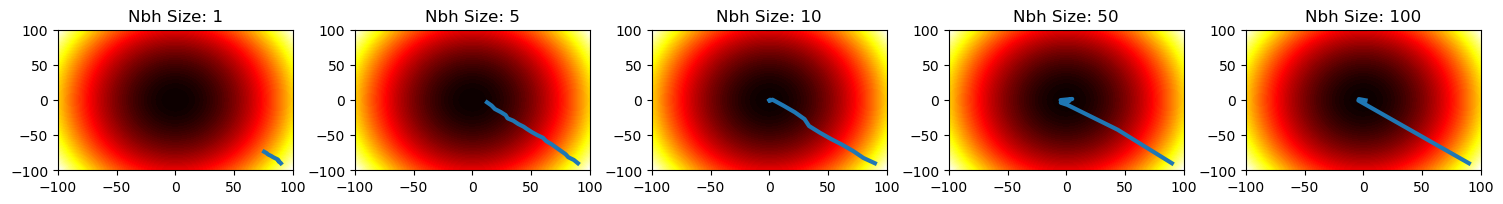

In [11]:
# PLEASE DO NOT REMOVE!
# Running the DFO algorithm with different step sizes
num_epochs = 20 # the number of epochs (you may change it!)

## PLEASE FILL IN
## Here all hyperparameters go.
## Please analyze at least one hyperparameter in a similar manner to the 
## step size in the GD algorithm.
# ...

nbh_sizes = [1, 5, 10, 50, 100]
search_intensity = 50

## plotting the convergence of the DFO
## Please uncomment the two lines below, but please provide the number of axes (replace HERE appriopriately)
fig_dfo, axs = plt.subplots(1, len(nbh_sizes), figsize=(15, 2))
fig_dfo.tight_layout()

for i in range(len(nbh_sizes)):
    dfo = DFO(f, nbh_sizes[i], search_intensity)
    plot_optimization_process(axs[i], optimizer=dfo, title='Nbh Size: ' + str(nbh_sizes[i]))